# Exploratory Data Analysis

- Eda Big Dataframe 

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

In [94]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [95]:
df = pd.read_csv('gdrive/My Drive/tracks.csv')
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [96]:
df.shape

(586672, 20)

In [97]:
df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [98]:
#Remove artist id
df = df.drop(columns=['id_artists'])

In [99]:
#Remove brackets drom artist column
df['artists'] = df['artists'].str.replace("'", '')
df['artists'] = df['artists'].str.replace('[', '')
df['artists'] = df['artists'].str.replace(']', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [100]:
#Fix Data types
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['time_signature'] = df['time_signature'].astype('category')
df['explicit'] = df['explicit'].astype('category')
df['release_date'] = pd.to_datetime(df['release_date'])

In [101]:
#Describe the data
df.describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.563594,0.542036,-10.206067,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857
std,18.370642,1.265261e+05,0.166103,0.251923,5.089328,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108
min,0.000000,3.344000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000
50%,27.000000,2.148930e+05,0.577000,0.549000,-9.243000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000
75%,41.000000,2.638670e+05,0.686000,0.748000,-6.482000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000
max,100.000000,5.621218e+06,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


In [102]:
#Find the duplicates
df.duplicated().sum()

0

In [103]:
#Find null values
df.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [104]:
#Percentage of null values 
float(100.0*71/586672)

0.012102162707611748

In [105]:
df = df.dropna()

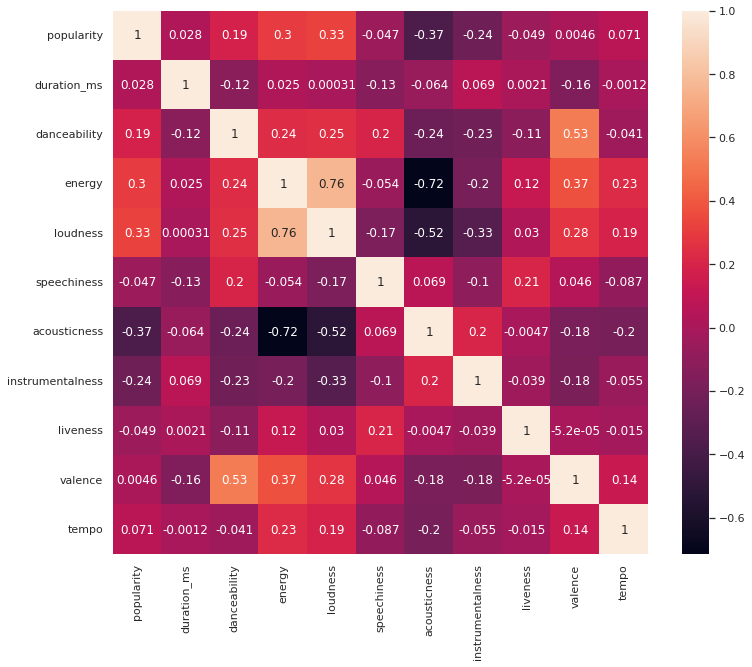

In [107]:
#Correlation plot
sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(df.corr(), annot=True)
plt.show()

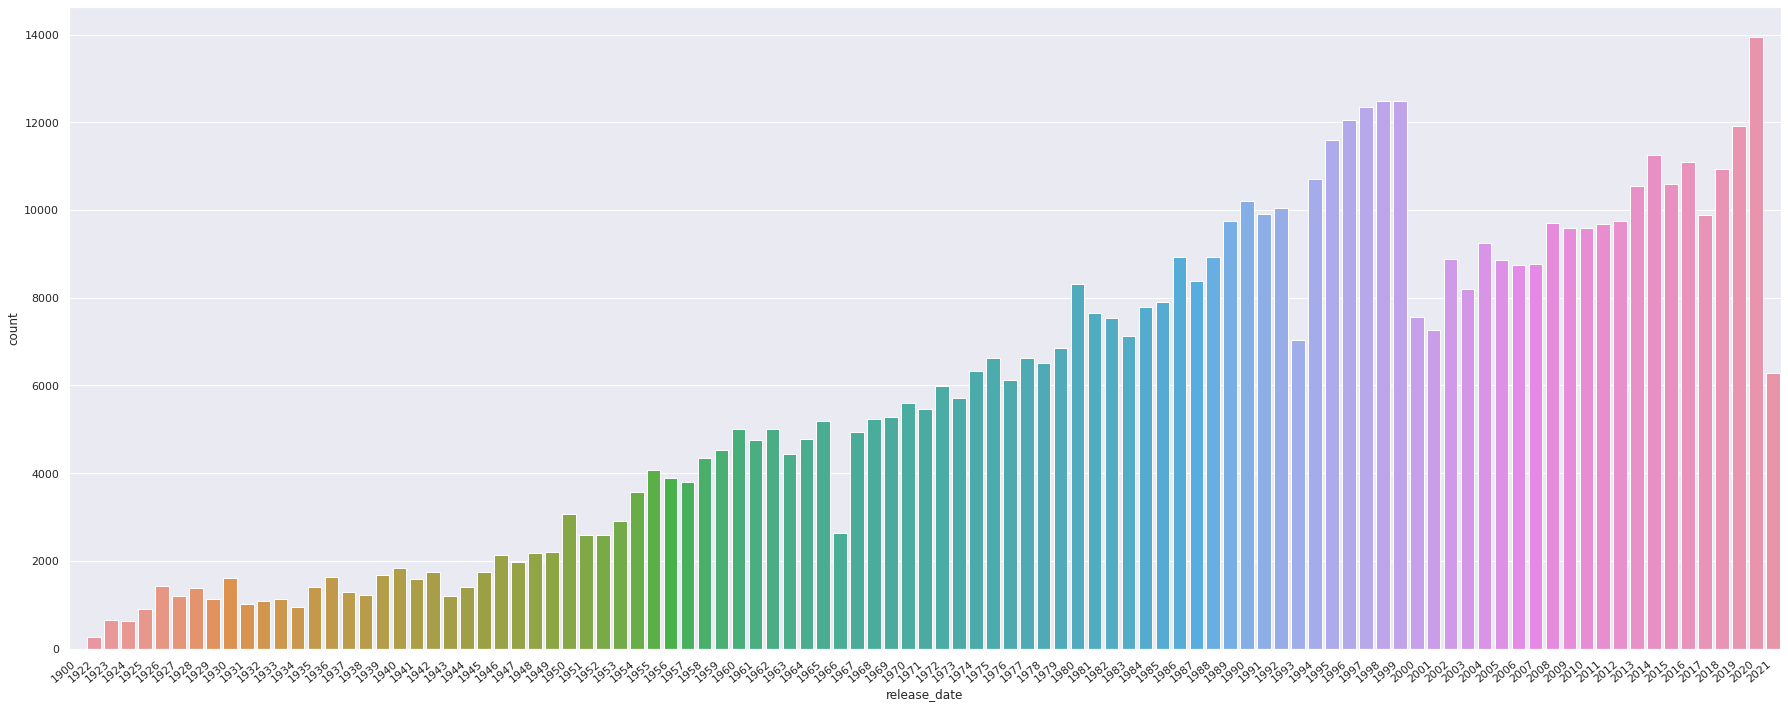

In [108]:
#sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(x=df['release_date'].dt.year, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [109]:
#To extract dataframe for another use
#df.to_csv(r'gdrive/My Drive/tracks-c.csv', index=False)

In [110]:
df.sort_values(by=['popularity'], ascending=False)[['name', 'artists','popularity']].head(20)

,name,artists,popularity
93802,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",100
93803,drivers license,Olivia Rodrigo,99
93804,Astronaut In The Ocean,Masked Wolf,98
92811,telepatía,Kali Uchis,97
92810,Save Your Tears,The Weeknd,97
93805,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic",96
92813,Blinding Lights,The Weeknd,96
92814,The Business,Tiësto,95
93806,Fiel,"Los Legendarios, Wisin, Jhay Cortez",94
92819,Bandido,"Myke Towers, Juhn",94


In [111]:
df['explicit'].value_counts()

0    560737
1     25864
Name: explicit, dtype: int64

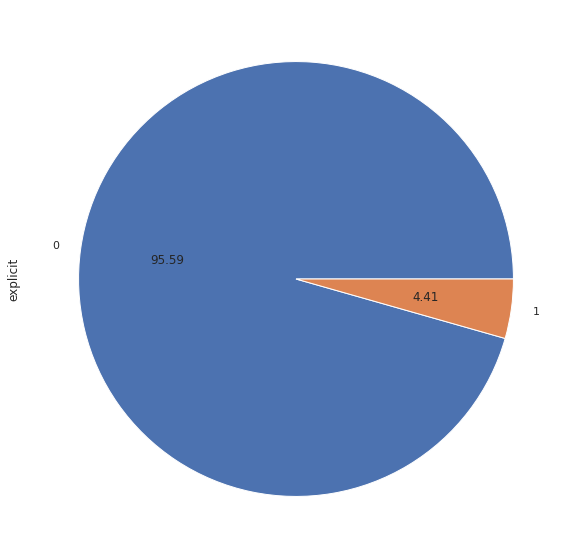

In [112]:
df['explicit'].value_counts().plot(kind='pie',autopct='%.2f')

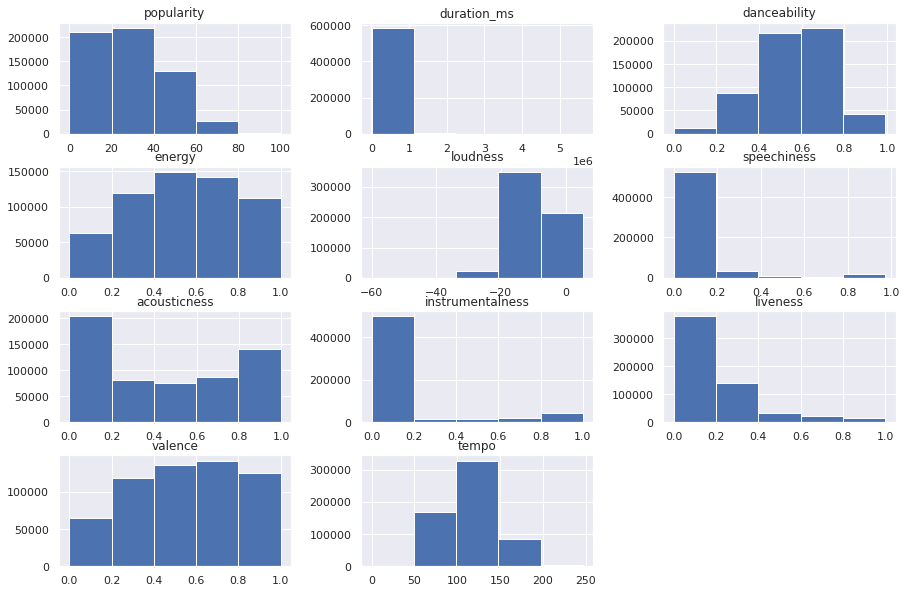

In [106]:
df1 = df.drop(columns=['release_date'])
hist = df1.hist(bins = 5, figsize = (15,10))

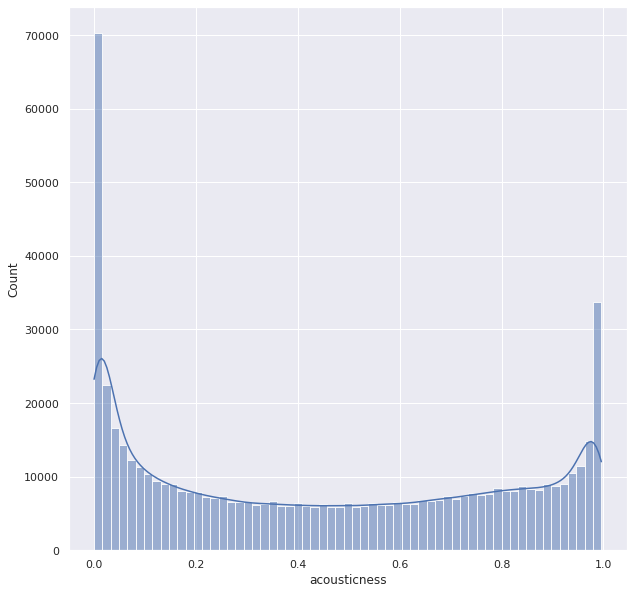

In [113]:
fig = plt.subplots(figsize=(10,10))
sns.histplot(x='acousticness', data=df, kde=True)

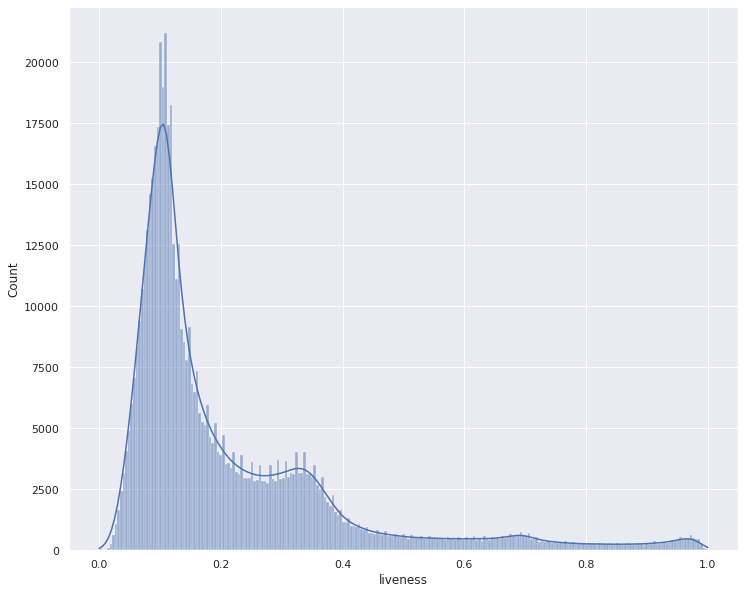

In [114]:
sns.histplot(x='liveness', data=df, kde=True)

In [115]:
#top 10 artist most songs 
df['artists'].value_counts().nlargest(10)

Die drei ???                          3856
TKKG Retro-Archiv                     2006
Benjamin Blümchen                     1503
Bibi Blocksberg                       1472
Lata Mangeshkar                       1373
Bibi und Tina                          927
Tintin, Tomas Bolme, Bert-Åke Varg     905
Francisco Canaro                       891
Ella Fitzgerald                        870
Tadeusz Dolega Mostowicz               838
Name: artists, dtype: int64

In [116]:
df['Y'] = pd.to_datetime(df['release_date']).dt.year
df['M'] = pd.to_datetime(df['release_date']).dt.month
df['D'] = pd.to_datetime(df['release_date']).dt.day

In [117]:
dffy = df[(df['Y'] >= 2000) & (df['Y'] <= 2010)]

In [118]:
dfly = df[(df['Y'] >= 2011)]

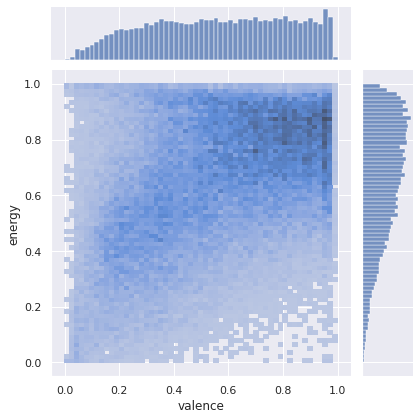

In [119]:
#join plot valence energy from 2000 to 2010
sns.jointplot(data=dffy, x="valence", y="energy",kind ='hist')

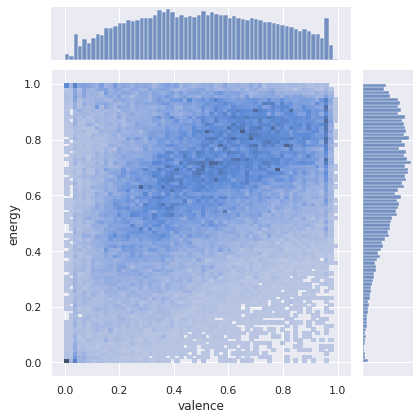

In [120]:
#join plot valence energy from 2011 to 2021
sns.jointplot(data=dfly, x="valence", y="energy",kind ='hist')